# Titanic Dataset EDA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load dataset
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

Shape: (891, 15)

Data Types:
 survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

Missing Values:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [15]:
# Since only 2 are missing in embark_town, the safest choice is to fill with the mode (most common value).
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

# since 177 mising values hence, Fill with Median
df['age'].fillna(df['age'].median(), inplace=True)

# Since the record of all deck for all passenger is not exists hence we will treat null values as "Unkown Deck" and will not include in analysis

C:\Users\mored\AppData\Local\Temp\ipykernel_4264\1598481912.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)
C:\Users\mored\AppData\Local\Temp\ipykernel_4264\1598481912.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [12]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64


In [6]:
# Survival rate overall
overall_survival = df["survived"].mean()
print("\nOverall Survival Rate:", round(overall_survival*100,2), "%")


Overall Survival Rate: 38.38 %


In [7]:
# Survival by sex
survival_by_sex = df.groupby("sex")["survived"].mean()
print("\nSurvival Rate by Sex:\n", survival_by_sex)


Survival Rate by Sex:
 sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


In [8]:
# Survival by class
survival_by_class = df.groupby("class")["survived"].mean()
print("\nSurvival Rate by Class:\n", survival_by_class)


Survival Rate by Class:
 class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64


C:\Users\mored\AppData\Local\Temp\ipykernel_4264\1147611664.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_class = df.groupby("class")["survived"].mean()


In [16]:
# Creating age groups
df["age_group"] = pd.cut(
    df["age"],
    bins=[0,12,18,35,60,90],
    labels=["Child","Teen","Young Adult","Adult","Senior"]
)

In [17]:
# Survival by age group
survival_by_age = df.groupby("age_group")["survived"].mean()
print("\nSurvival Rate by Age Group:\n", survival_by_age)


Survival Rate by Age Group:
 age_group
Child          0.579710
Teen           0.428571
Young Adult    0.353271
Adult          0.400000
Senior         0.227273
Name: survived, dtype: float64


C:\Users\mored\AppData\Local\Temp\ipykernel_4264\2415834316.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age = df.groupby("age_group")["survived"].mean()


Visuals

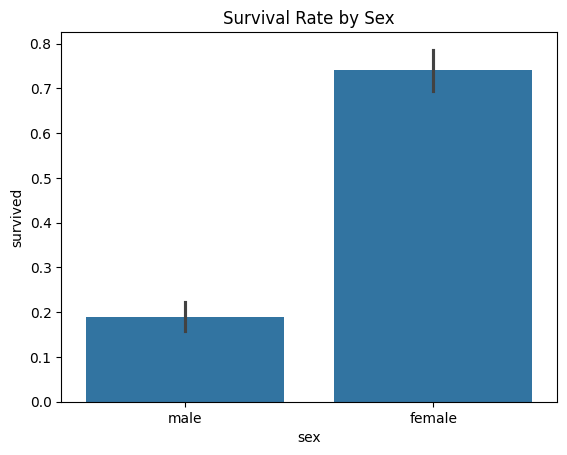

In [18]:
# Bar chart – Survival by Sex
sns.barplot(x="sex", y="survived", data=df)
plt.title("Survival Rate by Sex")
# plt.savefig("survival_by_sex.png", dpi=300)
plt.show()

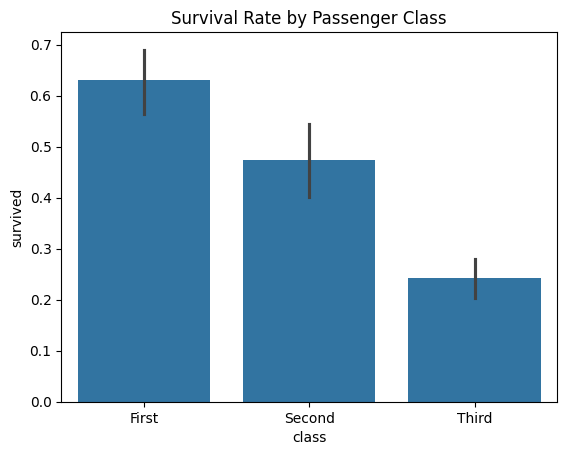

In [19]:
# Bar chart – Survival by Class
sns.barplot(x="class", y="survived", data=df)
plt.title("Survival Rate by Passenger Class")
# plt.savefig("survival_by_class.png", dpi=300)
plt.show()

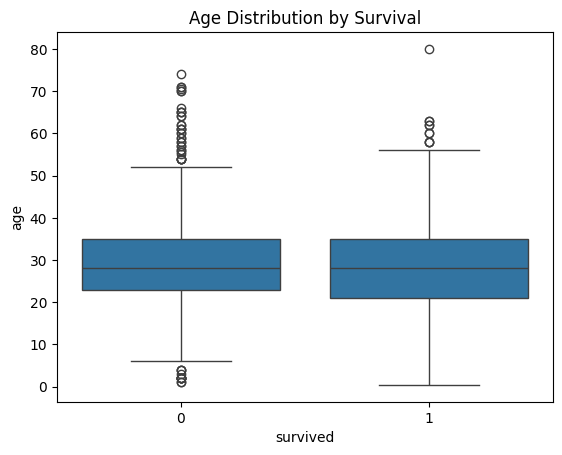

In [20]:
# Boxplot – Age vs Survival
sns.boxplot(x="survived", y="age", data=df)
plt.title("Age Distribution by Survival")
# plt.savefig("age_survival_boxplot.png", dpi=300)
plt.show()

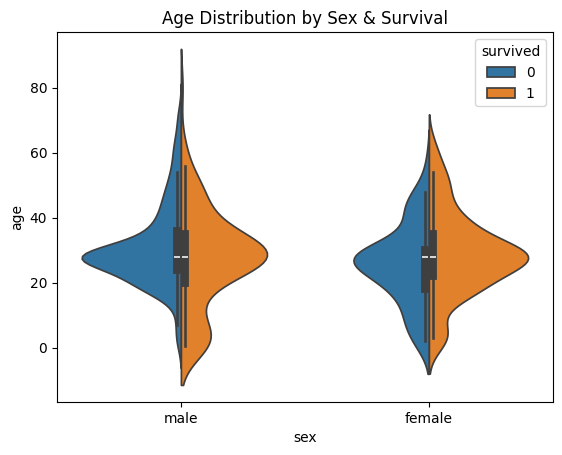

In [21]:
# Violin plot – Age vs Sex & Survival
sns.violinplot(x="sex", y="age", hue="survived", data=df, split=True)
plt.title("Age Distribution by Sex & Survival")
# plt.savefig("violin_age_sex_survival.png", dpi=300)
plt.show()

# Insights 

1. Females had a much higher survival rate than males.

2. 1st-class passengers survived more than 2nd and 3rd class.

3. Children had better survival odds compared to adults.
4. Many age values are missing, so analysis relies on available data.

5. Social class and gender strongly influenced survival.
